In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.DataFrame({'name' : ['Roman', 'Bohdan', 'Iryna', 'Anna', '...'],
                   'Age' : [30, 35, 25, 26, '...'],
                   'Salary' : [3000, 4000, 1500, 2000, '...'],
                   'Experience' : [3, 10, 5, 10, '...'],
                   'Python Knowledge' : [3, 3, 0, 9, '...'],
                   'Maths knowledge' : [15, 10, 5, 3, '...'],
                   'Stats knowledge' : [10, 10, 0, 5, '...']})

In [3]:
df

name  Age Salary Experience Python Knowledge Maths knowledge  \
0   Roman   30   3000          3                3              15   
1  Bohdan   35   4000         10                3              10   
2   Iryna   25   1500          5                0               5   
3    Anna   26   2000         10                9               3   
4     ...  ...    ...        ...              ...             ...   

  Stats knowledge  
0              10  
1              10  
2               0  
3               5  
4             ...

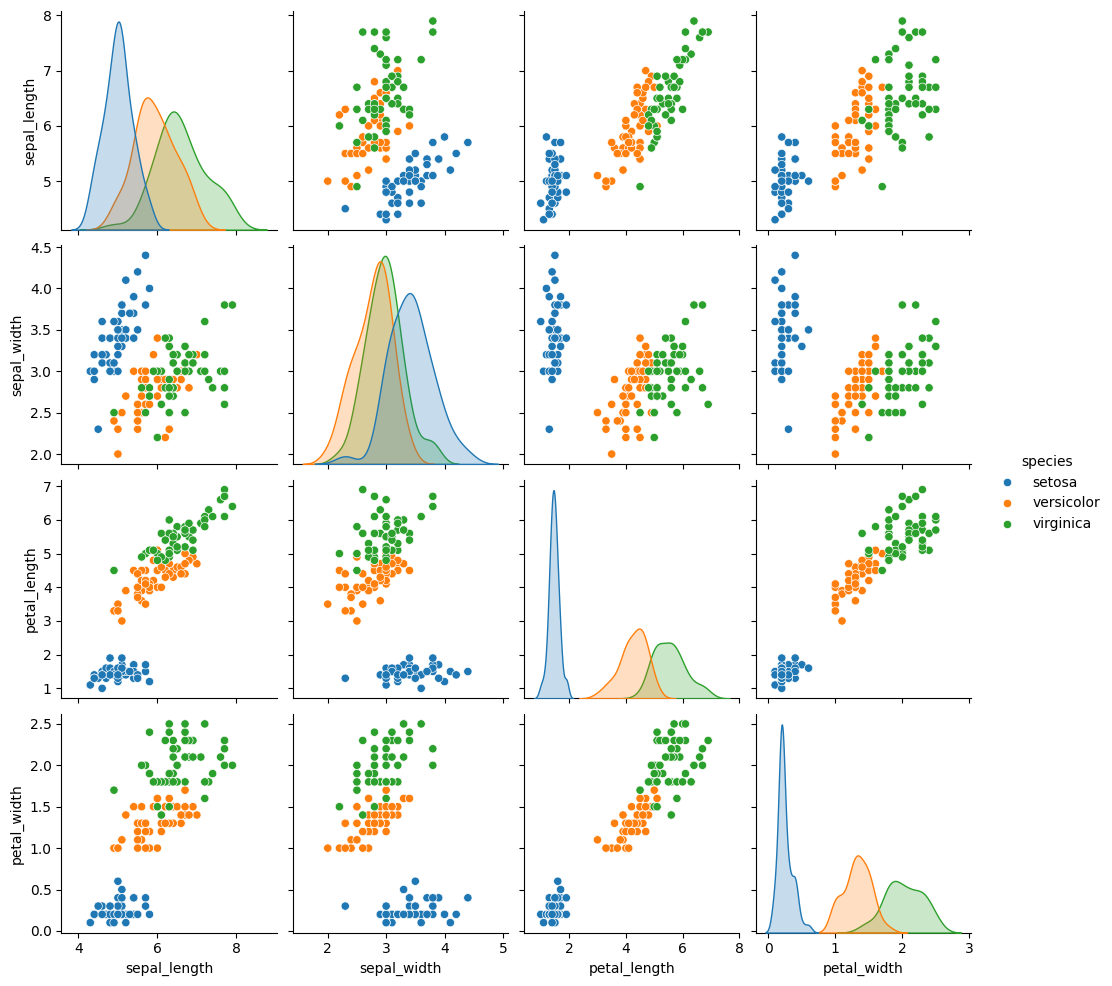

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt


iris = sns.load_dataset('iris')

sns.pairplot(iris, hue='species')

plt.show()


## K-Means


In [6]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [8]:
iris

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

In [9]:
iris = sns.load_dataset('iris')

X = iris.drop(columns=['species'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [29]:
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

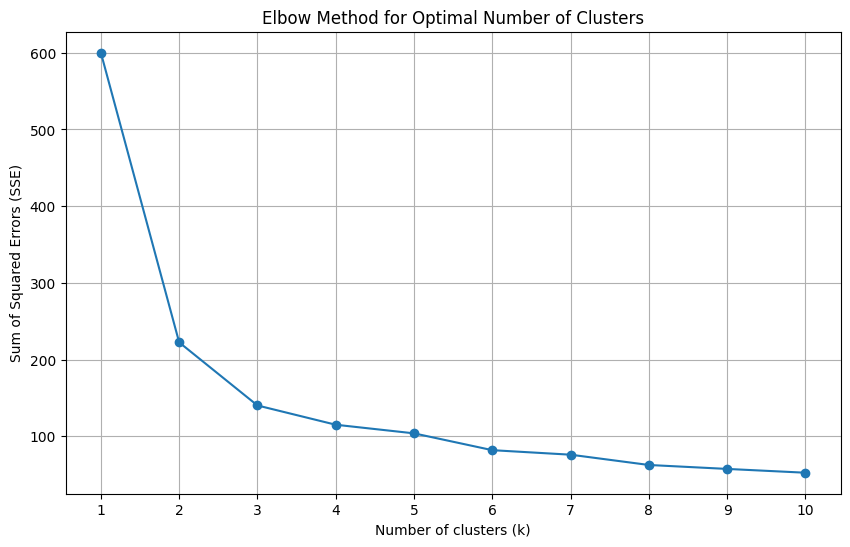

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [35]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k)
kmeans.fit(X_scaled)

KMeans(n_clusters=3)

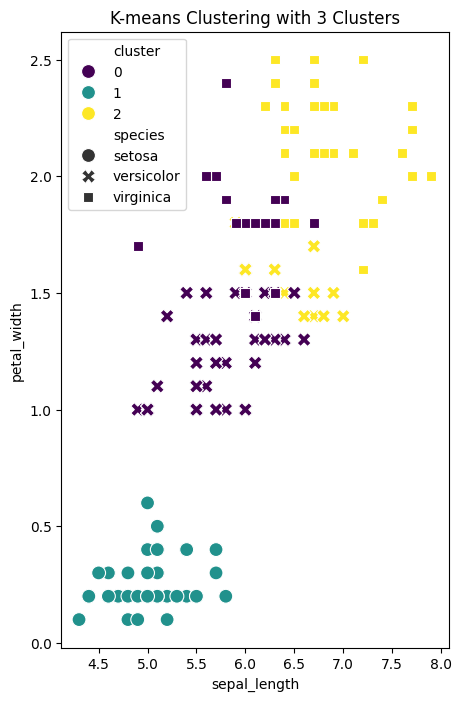

In [36]:
iris['cluster'] = kmeans.labels_

plt.figure(figsize=(5, 8))
sns.scatterplot(data=iris, x='sepal_length', y='petal_width', hue='cluster', palette='viridis', style='species', s=100)
plt.title(f'K-means Clustering with {optimal_k} Clusters')
plt.show()

## PCA

In [37]:
from sklearn.decomposition import PCA

np.random.seed(42)

n_samples = 100
feature_1 = np.random.rand(n_samples)
feature_2 = 0.8 * feature_1 + 0.2 * np.random.rand(n_samples) 
feature_3 = np.random.rand(n_samples)
feature_4 = 0.5 * feature_3 + 0.5 * np.random.rand(n_samples)  
feature_5 = np.random.rand(n_samples)
feature_6 = np.random.rand(n_samples)
feature_7 = 0.9 * feature_6 + 0.1 * np.random.rand(n_samples) 
feature_8 = np.random.rand(n_samples)
feature_9 = np.random.rand(n_samples)
feature_10 = np.random.rand(n_samples)

In [38]:
data = pd.DataFrame({
    'feature_1': feature_1,
    'feature_2': feature_2,
    'feature_3': feature_3,
    'feature_4': feature_4,
    'feature_5': feature_5,
    'feature_6': feature_6,
    'feature_7': feature_7,
    'feature_8': feature_8,
    'feature_9': feature_9,
    'feature_10': feature_10
})

In [39]:
data

feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0    0.374540   0.305918   0.642032   0.346857   0.103124   0.698162   
1    0.950714   0.887854   0.084140   0.307747   0.902553   0.536096   
2    0.731994   0.648466   0.161629   0.351132   0.505252   0.309528   
3    0.598658   0.580641   0.898554   0.767992   0.826457   0.813795   
4    0.156019   0.306328   0.606429   0.666260   0.320050   0.684731   
..        ...        ...        ...        ...        ...        ...   
95   0.493796   0.464878   0.522243   0.726500   0.353352   0.473962   
96   0.522733   0.563377   0.769994   0.814203   0.583656   0.667558   
97   0.427541   0.521455   0.215821   0.322408   0.077735   0.172320   
98   0.025419   0.197753   0.622890   0.686881   0.974395   0.192289   
99   0.107891   0.242288   0.085347   0.419945   0.986211   0.040869   

    feature_7  feature_8  feature_9  feature_10  
0    0.645239   0.532589   0.707239    0.207886  
1    0.510346   0.051824   0.152539    0.026532  
2    0.296276   0.336604   0.576288    0.181435  
3    0.741286   0.134415   0.606715    0.583042  
4    0.628322   0.063375   0.424131    0.421425  
..        ...        ...        ...         ...  
95   0.487627   0.872124   0.204984    0.091582  
96   0.629665   0.932118   0.293148    0.917314  
97   0.213212   0.565133   0.896336    0.136819  
98   0.188496   0.696651   0.013002    0.950237  
99   0.084896   0.922499   0.085509    0.446006  

[100 rows x 10 columns]

In [40]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data)

principal_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

In [41]:
principal_df

Principal Component 1  Principal Component 2
0                0.261944              -0.285121
1                0.298070               0.834527
2               -0.015521               0.488955
3                0.311928               0.014674
4                0.128918              -0.427368
..                    ...                    ...
95              -0.141828               0.059271
96              -0.028915              -0.121942
97              -0.174363               0.149705
98              -0.834984              -0.300206
99              -0.863180               0.049506

[100 rows x 2 columns]

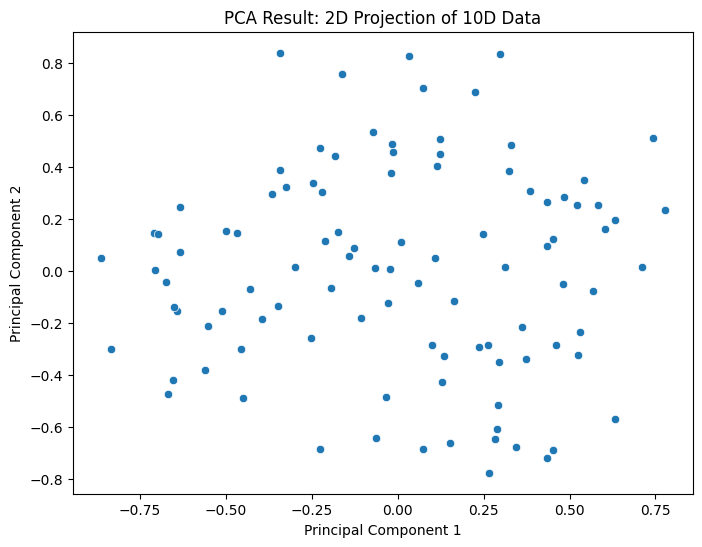

In [43]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=principal_df, x='Principal Component 1', y='Principal Component 2')
plt.title('PCA Result: 2D Projection of 10D Data')
plt.show()

In [ ]:
principal_df